# Plots

In [87]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math
import re

# magic f: %matplotlib inline` seems it is not important now, beacause automatically it works
%matplotlib inline
plt.style.use('dark_background')  # dark theme

## The method `plot()`

In [2]:
bar = pd.read_csv('./course-files/course-sources/weather_barcelona.csv', index_col='Date')
rom = pd.read_csv('./course-files/course-sources/weather_rome.csv', index_col='Date')
ams = pd.read_csv('./course-files/course-sources/weather_amsterdam.csv', index_col='Date')

In [3]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


In [4]:
rom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 2018-01-01 to 2018-03-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TempMax     90 non-null     int64 
 1   TempMin     90 non-null     int64 
 2   Rain        90 non-null     object
 3   AvgTempMax  90 non-null     int64 
 4   AvgTempMin  90 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.2+ KB


In [5]:
ams.describe()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,7.155556,0.433333,0.888889,5.511111,1.633333
std,3.702144,3.550756,1.776529,1.730392,0.929540
min,-5.000000,-9.000000,0.000000,4.000000,1.000000
25%,5.000000,-2.000000,0.000000,4.000000,1.000000
50%,7.000000,1.000000,0.000000,5.000000,1.000000
75%,10.000000,3.000000,1.000000,7.000000,2.000000
max,15.000000,7.000000,9.000000,9.000000,4.000000


<AxesSubplot:xlabel='Date'>

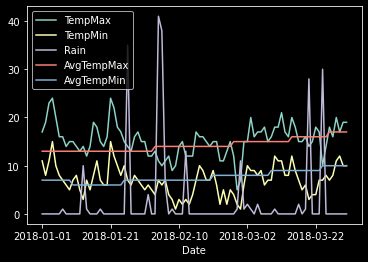

In [6]:
bar.plot()

<AxesSubplot:xlabel='Date'>

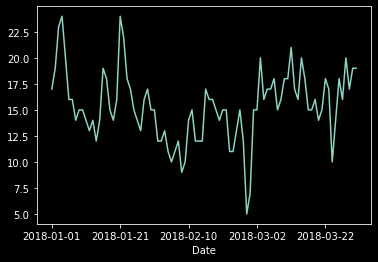

In [7]:
bar['TempMax'].plot()

<AxesSubplot:xlabel='Date'>

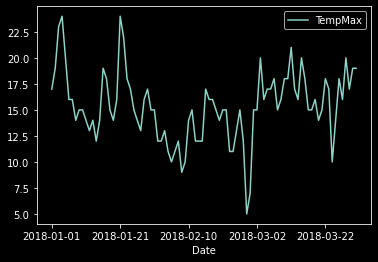

In [8]:
bar.plot(y='TempMax')

<AxesSubplot:xlabel='Date'>

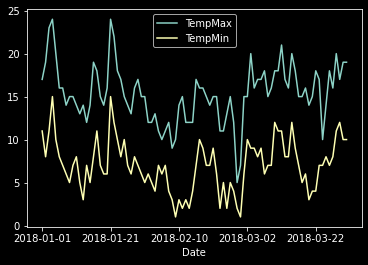

In [9]:
bar[['TempMax', 'TempMin']].plot()

<AxesSubplot:xlabel='Date'>

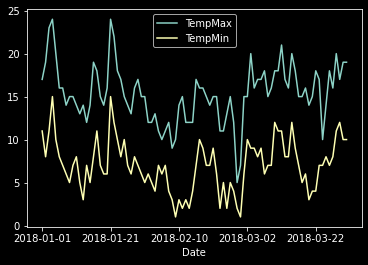

In [10]:
bar.plot(y=['TempMax', 'TempMin'])

## Parameters of `plot()` method

In [11]:
temp_max = pd.DataFrame(index=bar.index)  # create a DF with the same index like in barcelona DF
temp_max.head()

""
Date
2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05


In [12]:
temp_max['Barcelona'] = bar.TempMax
temp_max['Rome'] = rom.TempMax
temp_max['Amsterdam'] = ams.TempMax
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


<AxesSubplot:xlabel='Date'>

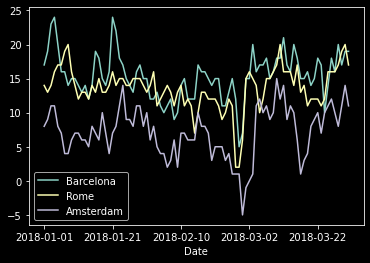

In [13]:
temp_max.plot()

<AxesSubplot:xlabel='Date'>

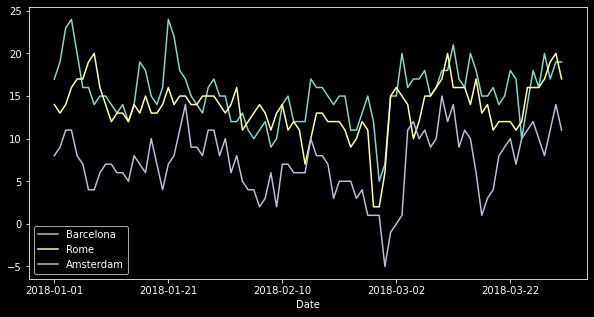

In [14]:
temp_max.plot(figsize=(10, 5))  # size of plot in print inches [w calach drukowanych]

<AxesSubplot:xlabel='Date'>

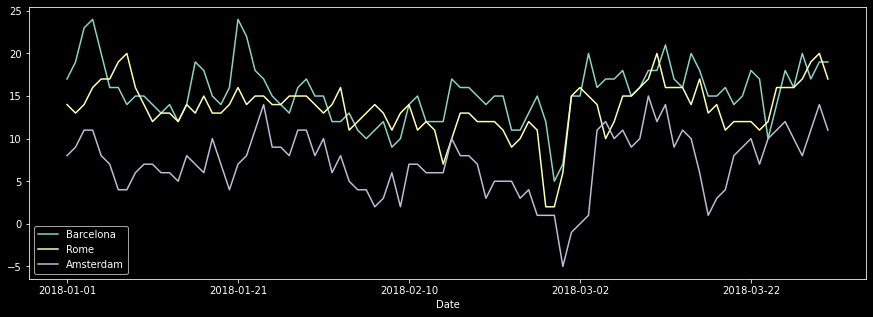

In [15]:
temp_max.plot(figsize=(15, 5))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

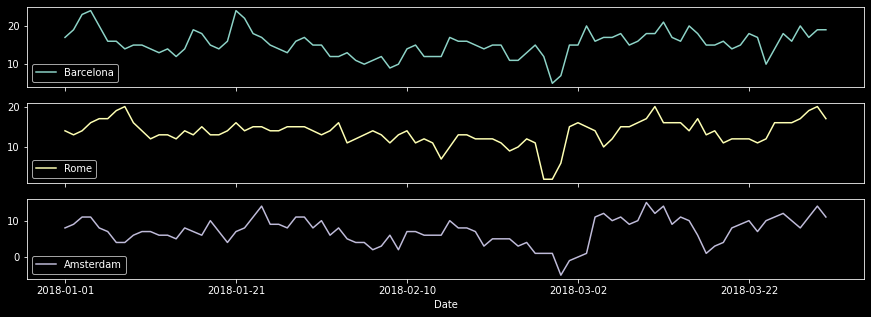

In [16]:
temp_max.plot(figsize=(15, 5), subplots=True)  # divided plot by columns

<AxesSubplot:>

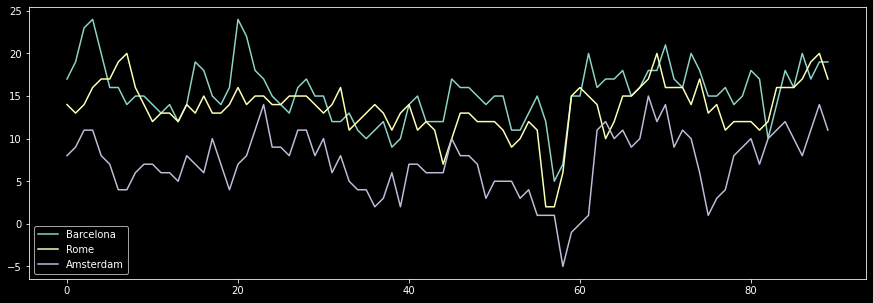

In [17]:
# instead of index from a source table use number of row (like in iloc)
temp_max.plot(figsize=(15,5), use_index=False)

<AxesSubplot:title={'center':'Max temperature by city'}, xlabel='Date'>

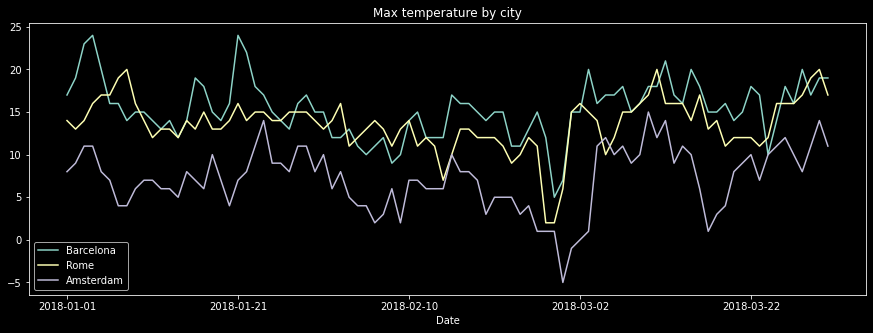

In [18]:
temp_max.plot(figsize=(15,5), title='Max temperature by city') # title

<AxesSubplot:xlabel='Date'>

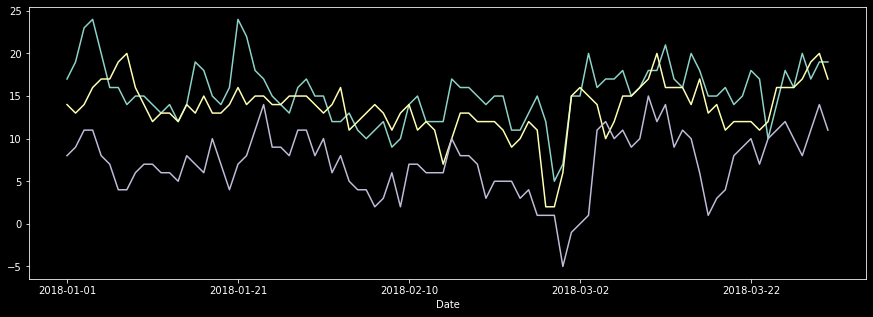

In [19]:
temp_max.plot(figsize=(15,5), legend=False)  # unvisible legend

<AxesSubplot:xlabel='Date'>

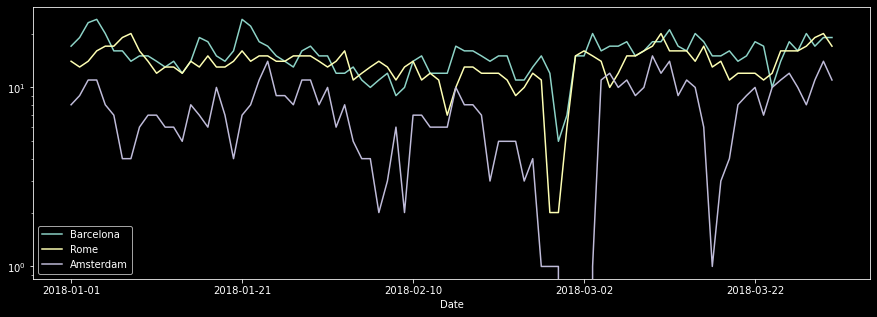

In [20]:
temp_max.plot(figsize=(15,5), logy=True)  # logarythmic values, better shows central values

<AxesSubplot:xlabel='Date'>

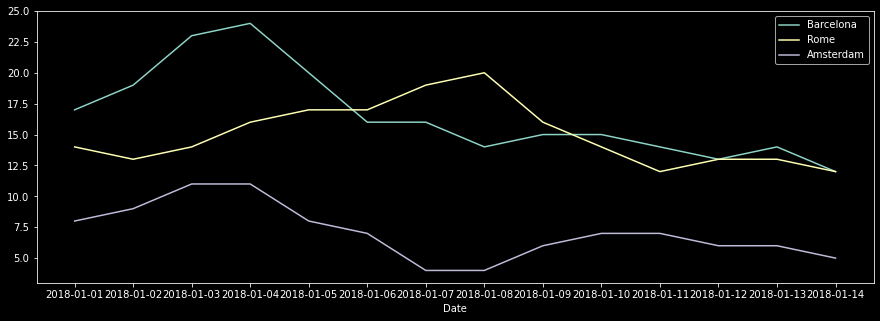

In [21]:
# a DF slice
# changing x axis description
temp_max.iloc[:14].plot(figsize=(15,5), xticks=(range(14)))

<AxesSubplot:xlabel='Date'>

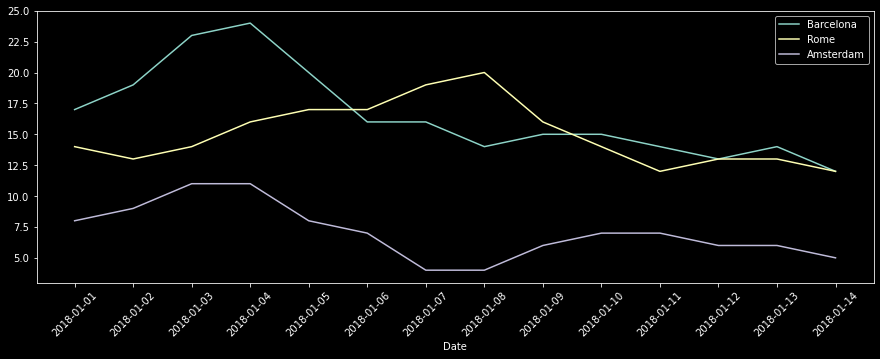

In [22]:
# changing x axis description with rotation of text
temp_max.iloc[:14].plot(figsize=(15,5), xticks=(range(14)), rot=45)

<AxesSubplot:xlabel='Date'>

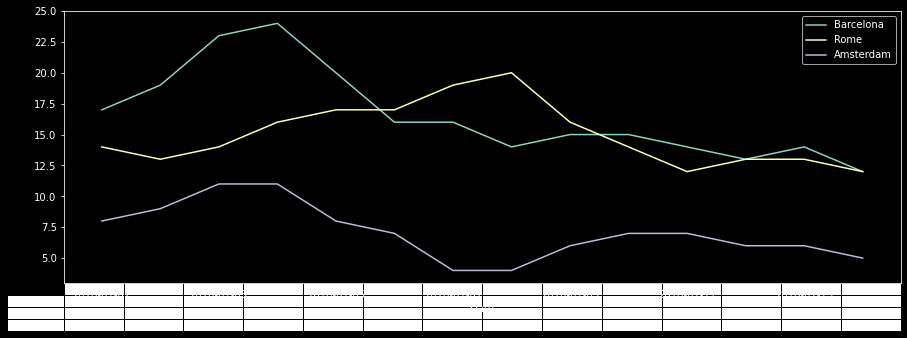

In [23]:
temp_max.iloc[:14].plot(figsize=(15,5), table=True)  # add a table with data, good for printing

## Plot's formatting

In [24]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


<AxesSubplot:xlabel='Date'>

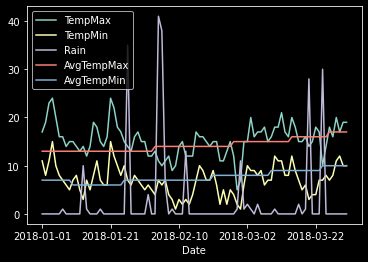

In [25]:
bar.plot()

<AxesSubplot:xlabel='Date'>

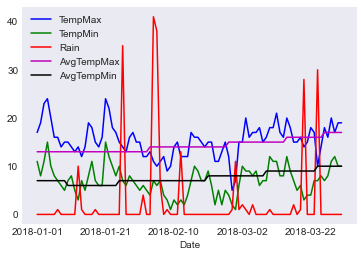

In [26]:
plt.style.use('seaborn-dark')
bar.plot(color=['b', 'g', 'r', 'm', 'k'])

<AxesSubplot:xlabel='Date'>

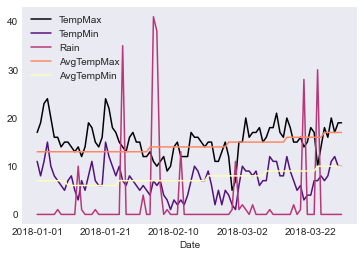

In [27]:
bar.plot(colormap='magma')

<AxesSubplot:xlabel='Date'>

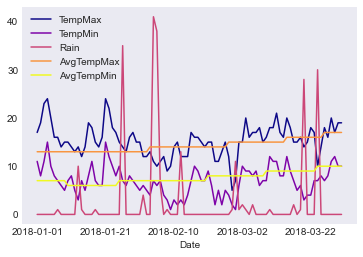

In [28]:
bar.plot(colormap='plasma')

<AxesSubplot:xlabel='Date'>

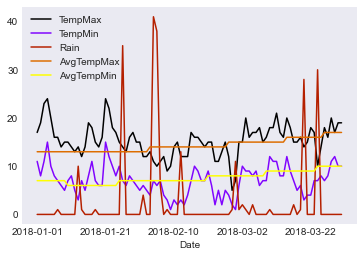

In [29]:
bar.plot(colormap='gnuplot')

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

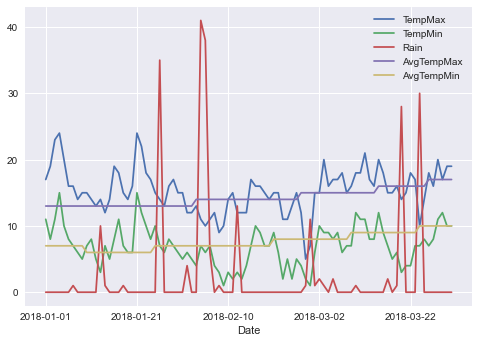

In [31]:
plt.style.use('seaborn')
bar.plot()

<AxesSubplot:xlabel='Date'>

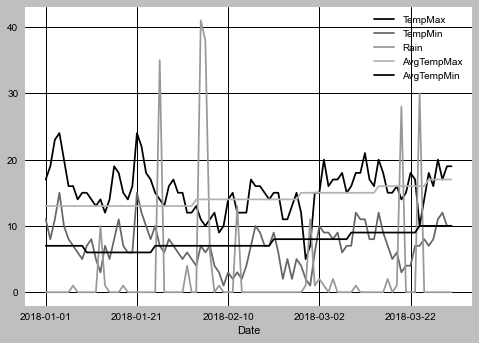

In [32]:
plt.style.use('grayscale')
bar.plot()

<AxesSubplot:xlabel='Date'>

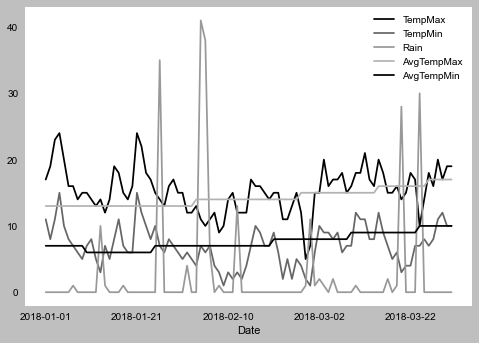

In [33]:
bar.plot(grid=False)

<AxesSubplot:xlabel='Date'>

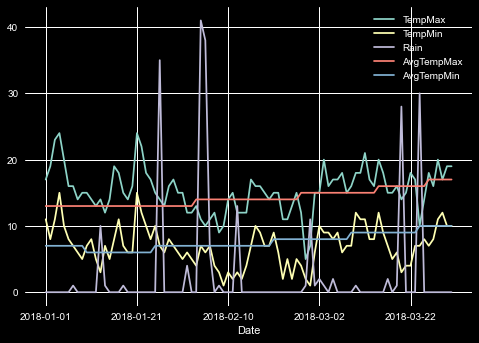

In [34]:
plt.style.use('dark_background')
bar.plot(grid=True)

## A pie chart

In [35]:
def grade_day(row):
    if row['TempMax'] >= row['AvgTempMax']:
        return 'PLUS'
    else:
        return 'MINUS'

In [36]:
rom['GradeDay'] = rom.apply(grade_day, axis=1)
bar['GradeDay'] = bar.apply(grade_day, axis=1)
ams['GradeDay'] = ams.apply(grade_day, axis=1)

In [37]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [38]:
rom.GradeDay.value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [39]:
cities3 = pd.DataFrame(index=['MINUS', 'PLUS'])
cities3['Barcelona'] = bar.GradeDay.value_counts()
cities3['Rome'] = rom.GradeDay.value_counts()
cities3['Amsterdam'] = ams.GradeDay.value_counts()
cities3

,Barcelona,Rome,Amsterdam
MINUS,26,20,22
PLUS,64,70,68


<AxesSubplot:ylabel='Barcelona'>

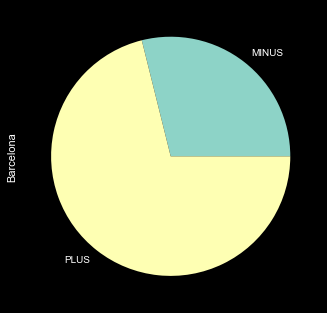

In [40]:
cities3.Barcelona.plot(kind='pie')

<AxesSubplot:ylabel='Barcelona'>

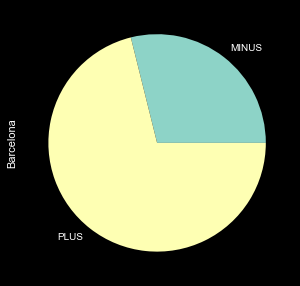

In [41]:
cities3.Barcelona.plot(
    kind='pie',
    figsize=(5, 5))

In [42]:
# cities3.plot(kind='pie')  # ValueError

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

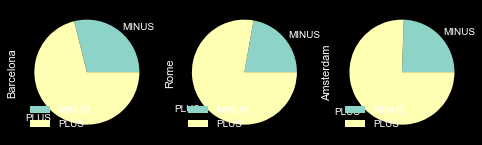

In [43]:
cities3.plot(
    kind='pie',
    subplots=True)

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

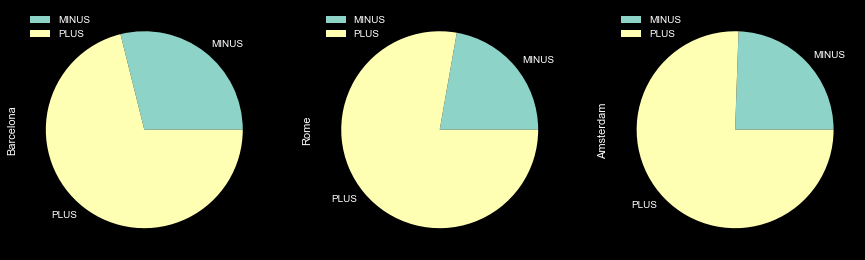

In [44]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(15,5))

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

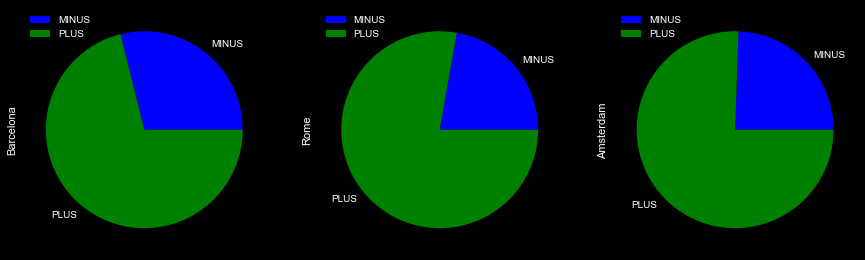

In [45]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(15,5),
    colors=['b', 'g'])

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

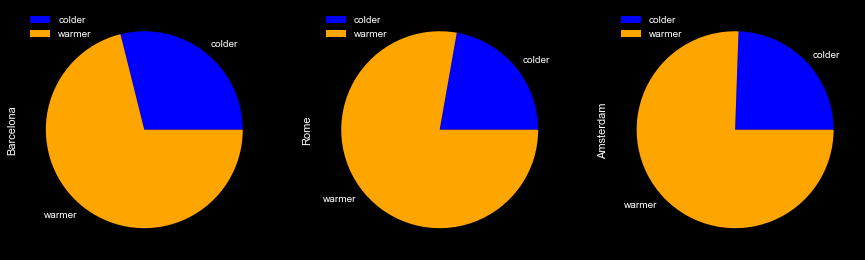

In [46]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(15,5),
    colors=['b', 'orange'],
    labels=['colder','warmer'])

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

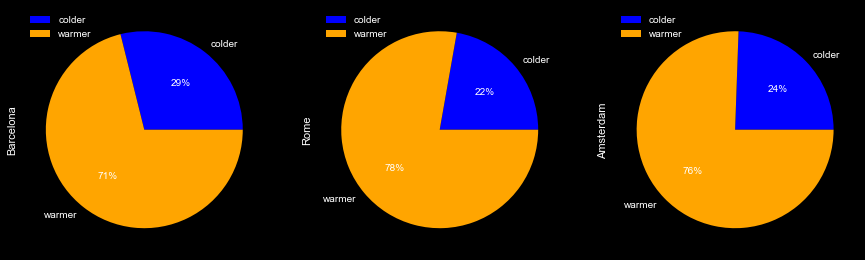

In [47]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(15,5),
    colors=['b', 'orange'],
    labels=['colder','warmer'],
    autopct='%.f%%')

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

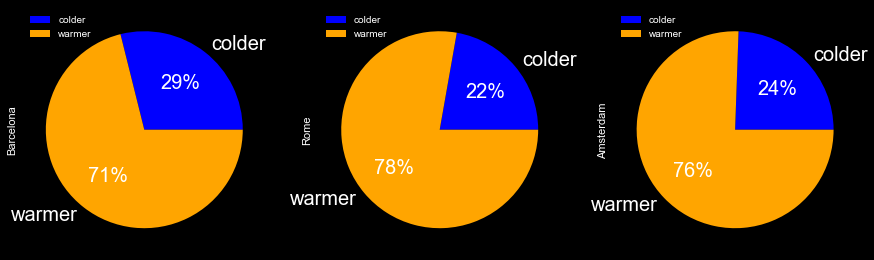

In [48]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(15,5),
    colors=['b', 'orange'],
    labels=['colder','warmer'],
    autopct='%.f%%',
    fontsize=20
)

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

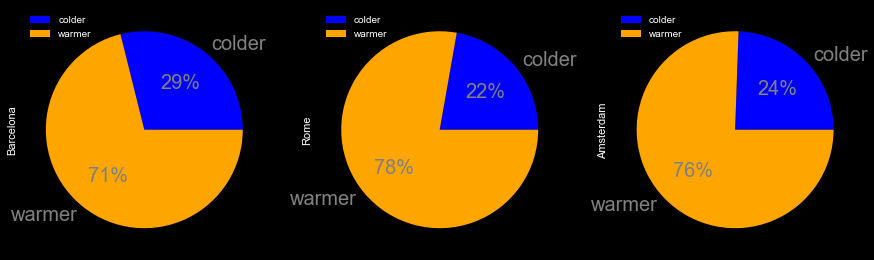

In [49]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(15,5),
    colors=['b', 'orange'],
    labels=['colder','warmer'],
    autopct='%.f%%',
    fontsize=20,
    textprops=dict(color='gray')
)

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

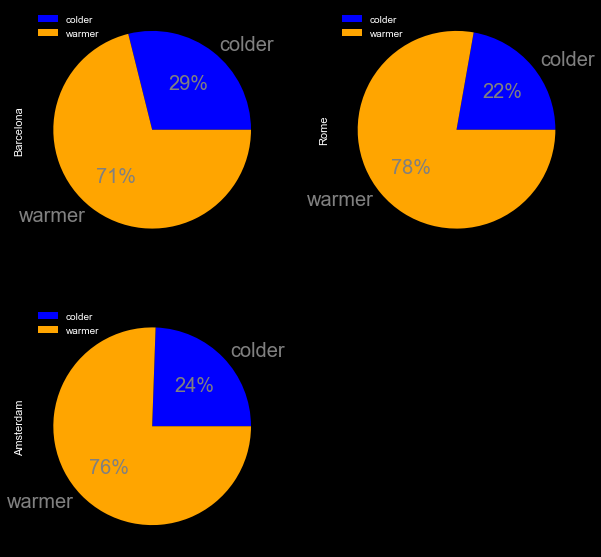

In [50]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(10,10),
    colors=['b', 'orange'],
    labels=['colder','warmer'],
    autopct='%.f%%',
    fontsize=20,
    textprops=dict(color='gray'),
    layout=(2, 2)  # grid with plots
)

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

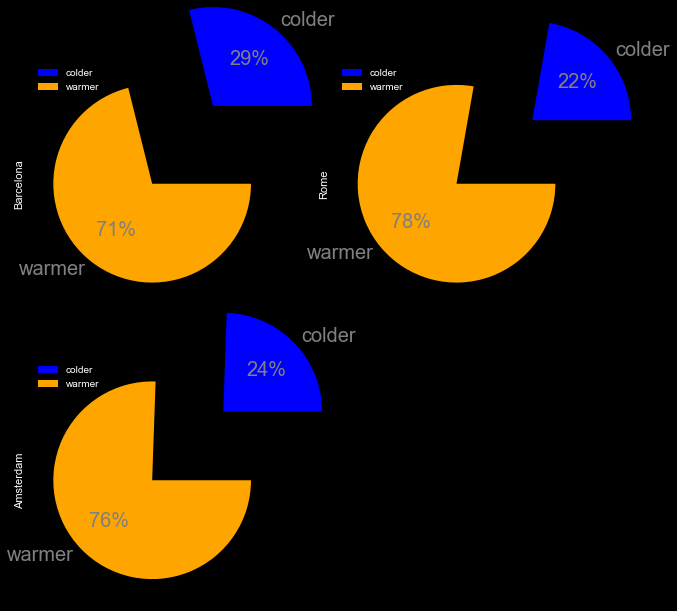

In [51]:
cities3.plot(
    kind='pie',
    subplots=True,
    figsize=(10,10),
    colors=['b', 'orange'],
    labels=['colder','warmer'],
    autopct='%.f%%',
    fontsize=20,
    textprops=dict(color='gray'),
    layout=(2, 2),  # grid with plots
    explode=(1, 0)
)

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

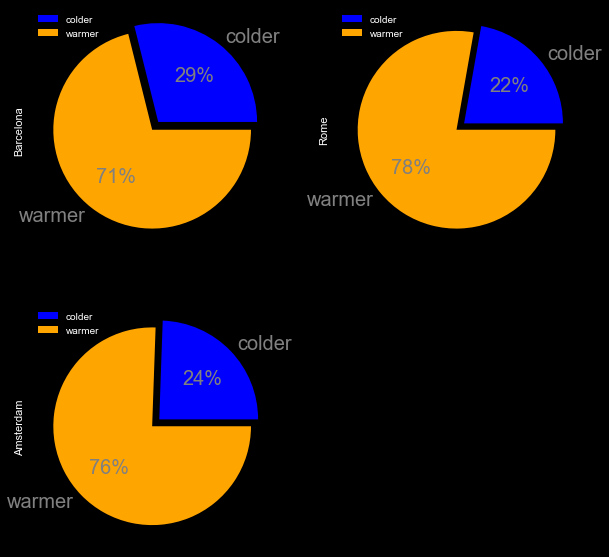

In [52]:
cities3.plot(
    kind='pie',  # kind of a chart
    subplots=True,  # divide plot by DataSeries from a DataFrame to subplots
    figsize=(10,10),  # field of the whole chart
    colors=['b', 'orange'],  # colors of parts of a pie
    labels=['colder','warmer'],  # [MINUS,PLUS] => [coler, warmer]
    autopct='%.f%%',  # format of percet description
    fontsize=20,
    textprops=dict(color='gray'),  # set color, and other text properties
    layout=(2, 2),  # grid with plots
    explode=(.1, 0)  # cut a part from a pie
)

## Charts: a bar chart [słupkowy, kolumnowy], a box plot [skrzynkowy, pudełkowy], histogram

### A bar chart

<AxesSubplot:>

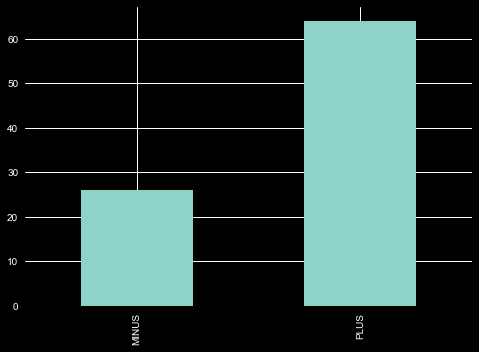

In [53]:
cities3.Barcelona.plot(kind='bar')

<AxesSubplot:>

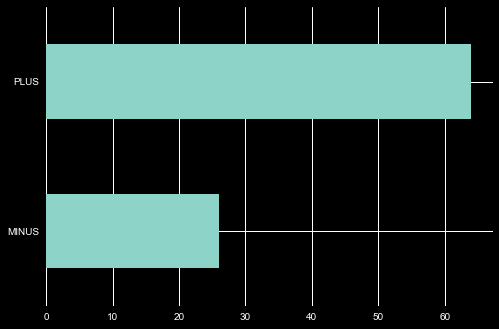

In [54]:
cities3.Barcelona.plot(kind='barh')  # barh like bar horizontal

<AxesSubplot:xlabel='Date'>

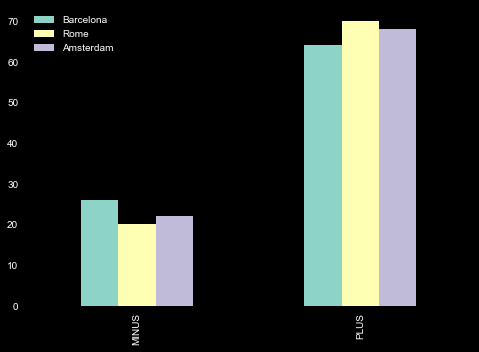

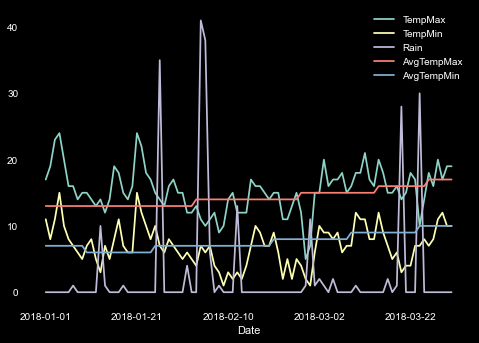

In [62]:
cities3.plot(kind='bar')  # more data is no problem like in pie chart
bar.plot(grid=False)

<AxesSubplot:>

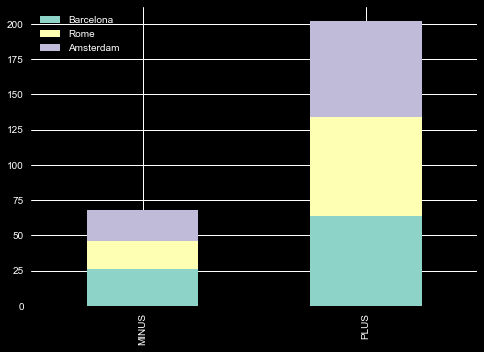

In [63]:
cities3.plot(kind='bar', stacked=True)  # sum of plus and sum of minus

### A box chart

In [58]:
temp_max

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8
...,...,...,...
2018-03-27,16,16,10
2018-03-28,20,17,8
2018-03-29,17,19,11


### A box chart
A central horizontal line in box means a median - central value. The median divides dataset to  lower and higher than median datasets.<br>
Above and below are 2 next horizontal lines that means points of quartiles 25% and 75%.
Top, bottom and central vertical lines divide dataset into 4 quartiles [kwartyle].<br>
Vertical lines - whiskers [wąsy]

<AxesSubplot:>

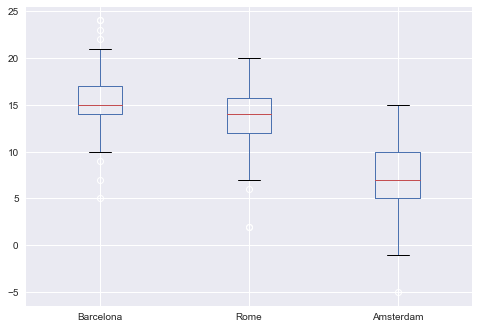

In [69]:
# plt.style.use('dark_background')
plt.style.use('seaborn')
temp_max.plot(kind='box')

<AxesSubplot:>

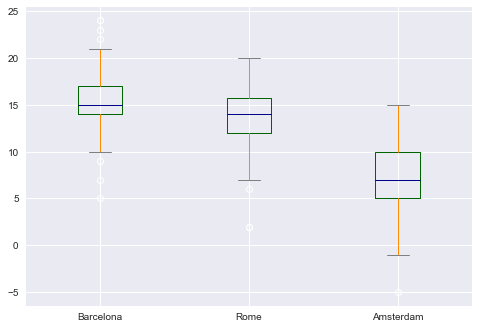

In [71]:
box_color = dict(
    boxes='DarkGreen',
    whiskers='DarkOrange',  # [wąsy]
    medians='DarkBlue',
    caps='Gray'  # minumum and maximum value
)
temp_max.plot(kind='box', color=box_color)

## A histogram

<AxesSubplot:ylabel='Frequency'>

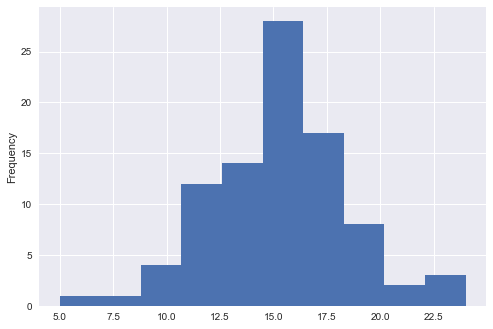

In [72]:
bar.TempMax.plot(kind='hist')  # average of how many days with temperature on X axis

In [74]:
bar.TempMax.value_counts().sort_index()

5      1
7      1
9      1
10     3
11     4
12     8
13     4
14    10
15    17
16    11
17     9
18     8
19     4
20     4
21     1
22     1
23     1
24     2
Name: TempMax, dtype: int64

In [75]:
bar.TempMax.nunique()

18

<AxesSubplot:ylabel='Frequency'>

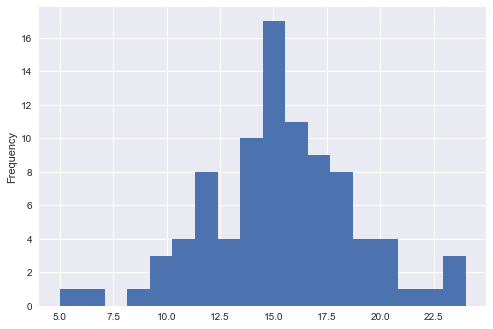

In [80]:
bar.TempMax.plot(kind='hist', bins=18)  # detailed histogram

## A scatter, hexbin, area
* scatter - a chart based on points \[punktowy\]
* hexbin - check if grouped datasets exist in source dataset
* area - sum of data from each column in one chart, it is a mix of a pie chart and a line chart

In [83]:
autos = pd.read_csv(
    './course-files/course-sources/autos.csv',
    encoding='latin-1'  # encoding is important for Northwind dataset too
)
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [86]:
autos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [85]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [90]:
reg = re.compile(r'.*corolla.*', re.IGNORECASE)
filter1 = autos['name'].apply(lambda x: bool(reg.search(x)))
filter2 = autos['price'] < 12000
filter3 = autos['yearOfRegistration'] >= 1990
tc = autos[filter1 & filter2 & filter3]
tc

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
861,2016-03-07 13:46:32,Toyota_Corolla_1.6_Combi_Sol,privat,Angebot,1800,control,kombi,2003,manuell,110,corolla,150000,6,benzin,toyota,ja,2016-03-07 00:00:00,0,53347,2016-03-10 10:46:17
912,2016-03-27 23:53:18,Toyota_Corolla_Verso_2.2_D_CAT_DPF_Executive,privat,Angebot,5300,test,bus,2008,manuell,177,verso,150000,1,diesel,toyota,nein,2016-03-27 00:00:00,0,63128,2016-04-06 09:15:32
1898,2016-03-22 20:52:00,Toyota_Corolla,privat,Angebot,3200,control,kleinwagen,2004,manuell,1398,corolla,5000,6,benzin,toyota,nein,2016-03-22 00:00:00,0,22043,2016-03-22 21:43:26
2264,2016-03-12 23:47:09,Toyota_Corolla_1.6_VVT_i_Combi_Sol,privat,Angebot,2990,control,kombi,2004,manuell,110,corolla,150000,8,benzin,toyota,nein,2016-03-12 00:00:00,0,16540,2016-03-31 06:47:04
2386,2016-03-10 14:48:16,Toyota_Corolla_Verso_2.2_D_CAT_Sol,privat,Angebot,5900,test,bus,2006,manuell,177,verso,150000,8,diesel,toyota,nein,2016-03-10 00:00:00,0,57072,2016-03-14 11:45:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370220,2016-03-08 19:51:27,Toyota_Corolla_1.4,privat,Angebot,3599,test,limousine,2002,manuell,97,corolla,125000,3,benzin,toyota,nein,2016-03-08 00:00:00,0,51588,2016-03-12 21:20:48
370878,2016-04-02 07:56:10,Toyota_Corolla_1.4_VVT_i___sol,privat,Angebot,4250,test,limousine,2005,manuell,97,corolla,125000,7,benzin,toyota,nein,2016-04-02 00:00:00,0,84051,2016-04-06 07:15:27
370926,2016-03-11 11:25:24,Top_zuverlaessiger_Toyota_Corolla!,privat,Angebot,820,test,limousine,1996,manuell,75,corolla,150000,11,benzin,toyota,nein,2016-03-11 00:00:00,0,35232,2016-03-11 11:25:24
371015,2016-03-31 20:53:02,Toyota_Corolla_1.4,privat,Angebot,1300,test,kombi,1997,manuell,75,corolla,150000,6,benzin,toyota,nein,2016-03-31 00:00:00,0,50321,2016-03-31 20:53:02


In [91]:
reg = re.compile(r'.*audi.*a4.*', re.IGNORECASE)
filter1 = autos['name'].apply(lambda x: bool(reg.search(x)))
filter2 = autos['price'] < 12000
filter3 = autos['yearOfRegistration'] >= 1990
audi = autos[filter1 & filter2 & filter3]
audi

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
103,2016-03-15 17:41:31,Audi_A4_B5_1_6_Liter,privat,Angebot,499,control,limousine,1995,manuell,101,a4,150000,5,benzin,audi,NaN,2016-03-15 00:00:00,0,85414,2016-03-22 20:48:22
105,2016-04-01 09:54:39,Audi_a4_2.5_TDI_Tausch_moeglich,privat,Angebot,6500,test,limousine,2004,manuell,163,a4,150000,4,diesel,audi,NaN,2016-04-01 00:00:00,0,97450,2016-04-01 09:54:39
147,2016-03-14 12:46:46,Audi_A4_b5_Avant_TÜV_10/17,privat,Angebot,1500,test,kombi,1996,manuell,126,a4,150000,0,NaN,audi,nein,2016-03-14 00:00:00,0,24873,2016-03-17 00:45:29
316,2016-03-19 10:54:59,Audi_A4_Cabriolet_3.0,privat,Angebot,5299,test,cabrio,2002,manuell,220,a4,150000,4,benzin,audi,nein,2016-03-19 00:00:00,0,80999,2016-04-02 14:46:07
408,2016-03-20 23:45:11,Audi_A4_1.8,privat,Angebot,2700,control,limousine,1999,manuell,125,a4,125000,7,benzin,audi,nein,2016-03-20 00:00:00,0,57072,2016-04-07 09:45:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371419,2016-03-19 17:37:38,Audi_A4_1_8_T,privat,Angebot,3000,control,limousine,2001,automatik,150,a4,150000,8,NaN,audi,ja,2016-03-19 00:00:00,0,71332,2016-03-19 17:37:38
371447,2016-03-19 21:36:24,Audi_A4_Avant_1.8_Neu_TueV_A1,privat,Angebot,1050,control,kombi,1997,manuell,125,a4,150000,3,benzin,audi,nein,2016-03-19 00:00:00,0,82256,2016-03-26 06:15:30
371452,2016-03-11 12:52:58,Audi_a4_b5_Kombi_1.8_Turbo,privat,Angebot,400,test,kombi,1996,manuell,150,a4,150000,0,benzin,audi,NaN,2016-03-11 00:00:00,0,85110,2016-03-11 13:43:10
371502,2016-04-01 12:59:21,Audi_A4_Avant_1.8,privat,Angebot,1600,test,kombi,1998,manuell,125,a4,150000,2,benzin,audi,nein,2016-04-01 00:00:00,0,34414,2016-04-07 09:44:29


<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

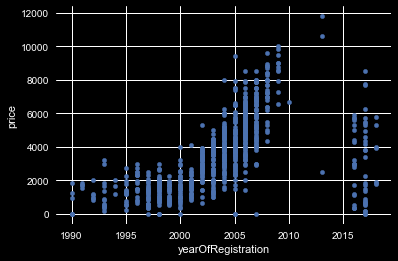

In [95]:
tc.plot(kind='scatter', x='yearOfRegistration', y='price')

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

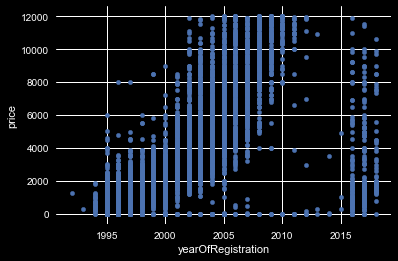

In [96]:
audi.plot(kind='scatter', x='yearOfRegistration', y='price')

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

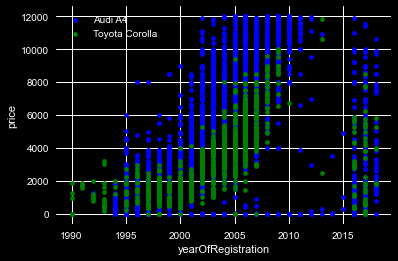

In [116]:
ax = audi.plot.scatter(x='yearOfRegistration', y='price', color='Blue', label='Audi A4')
tc.plot.scatter(x='yearOfRegistration', y='price', color='Green', label='Toyota Corolla', ax=ax)

<AxesSubplot:title={'center':'Audi A4'}, xlabel='yearOfRegistration', ylabel='price'>

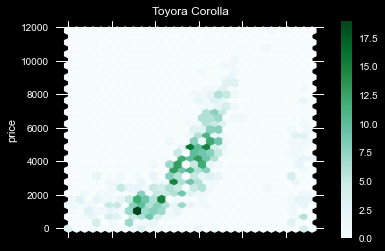

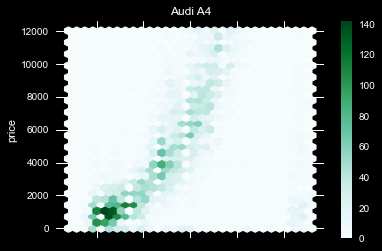

In [105]:
tc.plot.hexbin(x='yearOfRegistration', y='price', gridsize=30, title='Toyora Corolla')
audi.plot.hexbin(x='yearOfRegistration', y='price', gridsize=30, title='Audi A4')

<AxesSubplot:title={'center':'Audi A4'}, xlabel='yearOfRegistration', ylabel='price'>

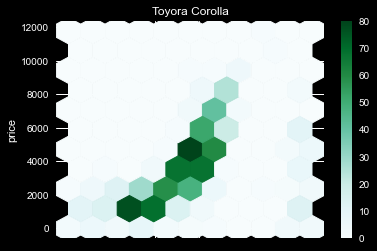

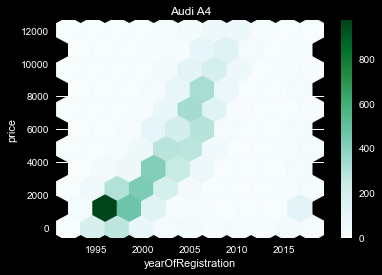

In [117]:
tc.plot.hexbin(x='yearOfRegistration', y='price', gridsize=10, title='Toyora Corolla')
# `sharex=False` can show x label with ticks
audi.plot.hexbin(x='yearOfRegistration', y='price', gridsize=10, title='Audi A4', sharex=False)

In [106]:
tc_counts = tc.yearOfRegistration.value_counts().sort_index()
tc_counts

1990      6
1991      4
1992      6
1993     13
1994      3
1995     16
1996     18
1997     36
1998     64
1999     34
2000     43
2001     40
2002     60
2003     77
2004     90
2005     91
2006    103
2007     71
2008     32
2009     11
2010      1
2013      3
2016     21
2017     30
2018      7
Name: yearOfRegistration, dtype: int64

In [107]:
audi_counts = audi.yearOfRegistration.value_counts().sort_index()
audi_counts

1992      1
1993      1
1994     39
1995    458
1996    609
1997    584
1998    463
1999    416
2000    416
2001    439
2002    617
2003    570
2004    545
2005    660
2006    567
2007    519
2008    365
2009    172
2010     72
2011     33
2012     12
2013      3
2014      3
2015      3
2016    115
2017    151
2018     51
Name: yearOfRegistration, dtype: int64

In [108]:
car_counts = pd.DataFrame(index=tc_counts.index.append(audi_counts.index).unique())
car_counts

""
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [109]:
car_counts['Toyota'] = tc_counts
car_counts['Audi'] = audi_counts
car_counts

,Toyota,Audi
1990,6.0,NaN
1991,4.0,NaN
1992,6.0,1.0
1993,13.0,1.0
1994,3.0,39.0
1995,16.0,458.0
1996,18.0,609.0
1997,36.0,584.0
1998,64.0,463.0
1999,34.0,416.0


In [110]:
car_counts.fillna(0, inplace=True)
car_counts

,Toyota,Audi
1990,6.0,0.0
1991,4.0,0.0
1992,6.0,1.0
1993,13.0,1.0
1994,3.0,39.0
1995,16.0,458.0
1996,18.0,609.0
1997,36.0,584.0
1998,64.0,463.0
1999,34.0,416.0


In [111]:
car_counts.sort_index(inplace=True)
car_counts

,Toyota,Audi
1990,6.0,0.0
1991,4.0,0.0
1992,6.0,1.0
1993,13.0,1.0
1994,3.0,39.0
1995,16.0,458.0
1996,18.0,609.0
1997,36.0,584.0
1998,64.0,463.0
1999,34.0,416.0


<AxesSubplot:>

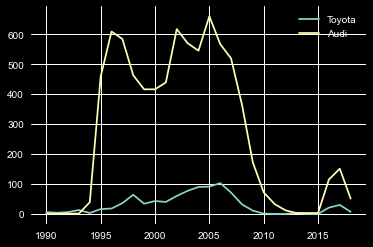

In [112]:
car_counts.plot()

<AxesSubplot:>

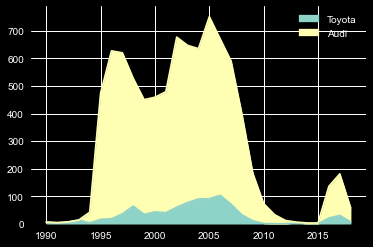

In [114]:
car_counts.plot(kind='area')  # yellow color is a sum of audi + toyota sells